In [1]:
import pandas as pd

In [2]:
filenames = ['devices', 'notifications', 'transactions_1', 'transactions_2', 'transactions_3', 'users']

dataframes = [pd.read_csv('data/' + filename + '.csv') for filename in filenames]

devices_df, notifications_df, transactions_1_df, transactions_2_df, transactions_3_df, users_df = dataframes

In [3]:
transactions_df = pd.concat([transactions_1_df, transactions_2_df, transactions_3_df])

In [4]:
transactions_df.shape

(2181026, 12)

In [5]:
transactions_df.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [6]:
users_tran = pd.merge(transactions_df, users_df, on='user_id', how='left')

In [7]:
users_tran = users_tran[users_tran['transactions_state']=='COMPLETED'][['user_id', 'transaction_id', 'amount_usd', 'created_date_x', 'birth_year', 'plan']]

In [8]:
users_tran.columns

Index(['user_id', 'transaction_id', 'amount_usd', 'created_date_x',
       'birth_year', 'plan'],
      dtype='object')

In [9]:
users_tran['created_date_x']=pd.to_datetime(users_tran['created_date_x'], format='%Y/%m/%d')

In [10]:
users_tran.dtypes

user_id                   object
transaction_id            object
amount_usd               float64
created_date_x    datetime64[ns]
birth_year                 int64
plan                      object
dtype: object

In [11]:
last_transaction = users_tran.created_date_x.max()

In [12]:
users_tran

,user_id,transaction_id,amount_usd,created_date_x,birth_year,plan
0,user_4368,transaction_0,4.55,2018-04-03 03:34:21.784487,1993,STANDARD
1,user_2355,transaction_1,15.50,2019-03-19 06:15:59.537032,1971,SILVER
2,user_2355,transaction_2,43.40,2019-03-18 18:53:41.323032,1971,SILVER
3,user_2355,transaction_3,10043.01,2019-03-22 14:20:01.513032,1971,SILVER
4,user_14318,transaction_4,43.81,2019-03-22 05:42:50.316652,1992,STANDARD
...,...,...,...,...,...,...
2181020,user_1011,transaction_2181020,46.81,2019-04-30 10:14:11.002961,1986,STANDARD
2181022,user_1011,transaction_2181022,1.70,2019-04-30 10:10:36.810961,1986,STANDARD
2181023,user_3170,transaction_2181023,4.26,2019-05-01 11:34:25.078035,1996,STANDARD
2181024,user_8195,transaction_2181024,1.70,2019-04-30 16:51:26.445105,1989,SILVER


In [13]:
users_tran_1 = users_tran.loc[users_tran.groupby(['user_id']).created_date_x.idxmax()].drop('created_date_x', axis=1)

In [14]:
users_tran_1['last_transaction'] = users_tran.loc[users_tran.groupby(['user_id']).created_date_x.idxmax()]['created_date_x']

In [15]:
users_tran_1['days_idle'] = last_transaction - users_tran_1['last_transaction']

In [16]:
users_tran_1

,user_id,transaction_id,amount_usd,birth_year,plan,last_transaction,days_idle
1667357,user_0,transaction_1667357,2.26,1992,STANDARD,2019-05-10 05:09:13.868855,5 days 16:09:08.792041
1392123,user_1,transaction_1392123,4.72,1985,STANDARD,2019-05-04 02:30:11.492146,11 days 18:48:11.168750
1237463,user_10,transaction_1237463,42.69,2000,STANDARD,2019-05-11 13:07:42.624413,4 days 08:10:40.036483
2120656,user_100,transaction_2120656,51.06,1986,STANDARD,2019-02-24 13:36:50.054151,80 days 07:41:32.606745
17889,user_1000,transaction_17889,15.89,1988,GOLD,2019-05-05 19:08:42.183644,10 days 02:09:40.477252
...,...,...,...,...,...,...,...
839739,user_9995,transaction_839739,51.71,1989,STANDARD,2019-05-01 12:21:34.372843,14 days 08:56:48.288053
2094003,user_9996,transaction_2094003,2.12,1964,STANDARD,2019-01-08 05:59:32.103756,127 days 15:18:50.557140
1661832,user_9997,transaction_1661832,7.23,1991,STANDARD,2019-04-27 00:32:53.447857,18 days 20:45:29.213039
1565238,user_9998,transaction_1565238,15.14,1990,STANDARD,2019-03-15 09:27:13.108571,61 days 11:51:09.552325


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
users_tran_1['days_idle'] = users_tran_1['days_idle'].apply(lambda x: x.total_seconds()/86400)

In [20]:
users_tran_1[users_tran_1['days_idle']>60]

,user_id,transaction_id,amount_usd,birth_year,plan,last_transaction,days_idle
2120656,user_100,transaction_2120656,51.06,1986,STANDARD,2019-02-24 13:36:50.054151,80.320516
164957,user_10001,transaction_164957,4.77,1993,STANDARD,2018-10-21 04:12:20.964905,206.712520
1887138,user_10002,transaction_1887138,2.40,1994,STANDARD,2019-02-05 13:19:27.675019,99.332581
2027305,user_10004,transaction_2027305,23.83,1983,STANDARD,2019-01-31 03:11:04.220955,104.755075
550293,user_10005,transaction_550293,0.85,1996,STANDARD,2018-08-28 21:38:31.593994,259.986008
...,...,...,...,...,...,...,...
1309872,user_999,transaction_1309872,8.42,1989,STANDARD,2018-12-15 11:18:38.318454,151.416485
592793,user_9991,transaction_592793,5.11,1978,STANDARD,2018-11-05 16:44:50.343389,191.189957
1332223,user_9992,transaction_1332223,41.46,1994,STANDARD,2019-01-28 20:37:41.250699,107.028257
2094003,user_9996,transaction_2094003,2.12,1964,STANDARD,2019-01-08 05:59:32.103756,127.638085


In [21]:
import numpy as np

In [22]:
users_tran_1.sort_values('days_idle', inplace=True)

In [23]:
users_tran_1

,user_id,transaction_id,amount_usd,birth_year,plan,last_transaction,days_idle
1395565,user_9036,transaction_1395565,1.45,1998,STANDARD,2019-05-15 21:18:22.660896,0.000000
1604419,user_13362,transaction_1604419,39.77,1985,STANDARD,2019-05-15 00:32:54.423869,0.864910
1395794,user_8012,transaction_1395794,3.40,1997,STANDARD,2019-05-14 19:54:29.999420,1.058248
842893,user_9386,transaction_842893,10.21,1992,STANDARD,2019-05-14 10:53:03.796304,1.434246
2172856,user_1314,transaction_2172856,25.53,1986,STANDARD,2019-05-14 08:50:21.798326,1.519454
...,...,...,...,...,...,...,...
438577,user_14928,transaction_438577,189.06,1987,STANDARD,2018-01-07 09:12:24.149111,493.504149
1064750,user_12483,transaction_1064750,255.80,1995,STANDARD,2018-01-06 23:12:32.448855,493.920720
1212889,user_14621,transaction_1212889,9.55,1991,STANDARD,2018-01-06 08:15:03.725671,494.543969
437359,user_8301,transaction_437359,238.30,1987,STANDARD,2018-01-06 07:46:09.477060,494.564041


In [24]:
users_tran_1['sum_users'] = np.array(list(range(1, 14822)))

In [25]:
users_tran_1

,user_id,transaction_id,amount_usd,birth_year,plan,last_transaction,days_idle,sum_users
1395565,user_9036,transaction_1395565,1.45,1998,STANDARD,2019-05-15 21:18:22.660896,0.000000,1
1604419,user_13362,transaction_1604419,39.77,1985,STANDARD,2019-05-15 00:32:54.423869,0.864910,2
1395794,user_8012,transaction_1395794,3.40,1997,STANDARD,2019-05-14 19:54:29.999420,1.058248,3
842893,user_9386,transaction_842893,10.21,1992,STANDARD,2019-05-14 10:53:03.796304,1.434246,4
2172856,user_1314,transaction_2172856,25.53,1986,STANDARD,2019-05-14 08:50:21.798326,1.519454,5
...,...,...,...,...,...,...,...,...
438577,user_14928,transaction_438577,189.06,1987,STANDARD,2018-01-07 09:12:24.149111,493.504149,14817
1064750,user_12483,transaction_1064750,255.80,1995,STANDARD,2018-01-06 23:12:32.448855,493.920720,14818
1212889,user_14621,transaction_1212889,9.55,1991,STANDARD,2018-01-06 08:15:03.725671,494.543969,14819
437359,user_8301,transaction_437359,238.30,1987,STANDARD,2018-01-06 07:46:09.477060,494.564041,14820


**We decide which users are unengaged based on their last transaction**

Text(100, 9000, 'Churn Point')

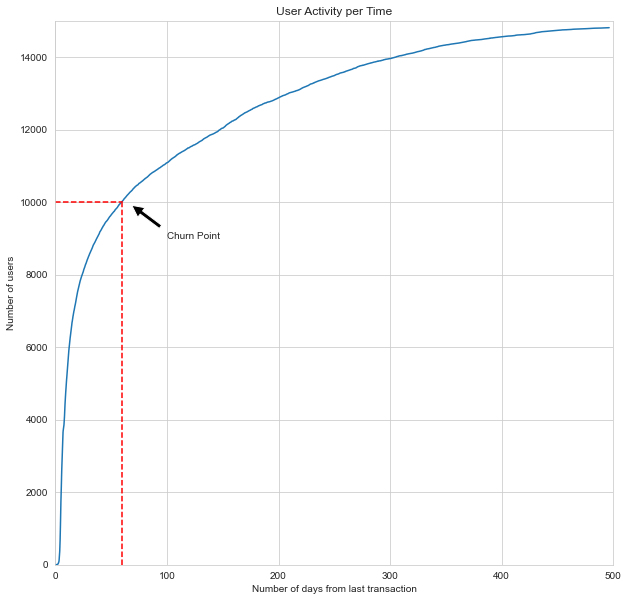

In [26]:
plt.figure(figsize=(10,10), )
sns.set_style("whitegrid")
sns.lineplot(x='days_idle', y='sum_users', data=users_tran_1, markers=True)
plt.xlabel('Number of days from last transaction')
plt.ylabel('Number of users');
plt.xlim([0, 500])
plt.ylim([0, 15000])
plt.title('User Activity per Time')
plt.axhline(10000, color="red", linestyle="--", xmax=0.121)
plt.axvline(60, color="red", linestyle="--", ymax=0.666)
plt.annotate('Churn Point', xy=(65, 10000),xytext=(100, 9000), arrowprops=dict(facecolor='black', shrink=0.1), )

In [27]:
def func(x):
    if x>60:
        return 1
    else:
        return 0
    
users_tran_1['churn'] = users_tran_1.apply(lambda x: func(x['days_idle']), axis=1)

In [28]:
users1_df = pd.merge(users_tran_1, devices_df, on='user_id')
notifications_df = notifications_df[notifications_df['status'] == 'SENT'].copy()
notifications_df.drop(['status','created_date'],axis=1, inplace=True)
notifications_df = pd.get_dummies(notifications_df, columns=['reason','channel'])
notifications_df = notifications_df.groupby('user_id').sum()

In [29]:
users1_df

,user_id,transaction_id,amount_usd,birth_year,plan,last_transaction,days_idle,sum_users,churn,brand
0,user_9036,transaction_1395565,1.45,1998,STANDARD,2019-05-15 21:18:22.660896,0.000000,1,0,Apple
1,user_13362,transaction_1604419,39.77,1985,STANDARD,2019-05-15 00:32:54.423869,0.864910,2,0,Android
2,user_8012,transaction_1395794,3.40,1997,STANDARD,2019-05-14 19:54:29.999420,1.058248,3,0,Android
3,user_9386,transaction_842893,10.21,1992,STANDARD,2019-05-14 10:53:03.796304,1.434246,4,0,Apple
4,user_1314,transaction_2172856,25.53,1986,STANDARD,2019-05-14 08:50:21.798326,1.519454,5,0,Apple
...,...,...,...,...,...,...,...,...,...,...
14816,user_14928,transaction_438577,189.06,1987,STANDARD,2018-01-07 09:12:24.149111,493.504149,14817,1,Android
14817,user_12483,transaction_1064750,255.80,1995,STANDARD,2018-01-06 23:12:32.448855,493.920720,14818,1,Android
14818,user_14621,transaction_1212889,9.55,1991,STANDARD,2018-01-06 08:15:03.725671,494.543969,14819,1,Android
14819,user_8301,transaction_437359,238.30,1987,STANDARD,2018-01-06 07:46:09.477060,494.564041,14820,1,Android


## Creating a complete dataframe for users including all features

In [30]:
users1_df['age'] = 2020 - users1_df['birth_year']
users1_df.drop(['birth_year'],axis=1, inplace=True)
transactions_df = transactions_df[transactions_df['transactions_state'] == 'COMPLETED']
num_transactions = transactions_df.groupby('user_id')[['amount_usd']].count()
num_transactions.rename({'amount_usd': 'num_transactions'}, axis=1, inplace=True)
transactions_df.drop(['transaction_id','transactions_currency','transactions_state','ea_cardholderpresence','ea_merchant_mcc','ea_merchant_city','ea_merchant_country','created_date'],axis=1, inplace=True)
transactions_tot = transactions_df.groupby('user_id')[['amount_usd']].sum()
refunds_df = transactions_df[transactions_df['transactions_type']=='REFUND'].groupby('user_id')[['amount_usd']].sum()
refunds_df = refunds_df.rename(columns={'amount_usd':'refunds'})
card_refunds_df = transactions_df[transactions_df['transactions_type']=='CARD_REFUND'].groupby('user_id')[['amount_usd']].sum()
card_refunds_df = card_refunds_df.rename(columns={'amount_usd':'card_refunds'})
transactions_tot = transactions_tot.merge(refunds_df, right_index=True, left_index=True, how='outer')
transactions_tot = transactions_tot.merge(card_refunds_df, right_index=True, left_index=True, how='outer')
transactions_tot.fillna(0, inplace = True)
transactions_tot['usd_tot'] =transactions_tot['amount_usd']-transactions_tot['refunds']-transactions_tot['card_refunds']

In [31]:
transactions_df = pd.get_dummies(transactions_df, columns=['transactions_type','direction'])
transactions_df = transactions_df.groupby('user_id').sum()
transactions_df.drop(['amount_usd'],axis=1, inplace=True)
users1_df = pd.merge(users1_df, transactions_tot['usd_tot'], on='user_id', how = 'left')
users1_df = pd.merge(users1_df, num_transactions, on='user_id', how='left') 
users1_df[['usd_tot','num_transactions']]=users1_df[['usd_tot','num_transactions']].fillna(0)
users1_df = pd.concat([users1_df,pd.get_dummies(users1_df['brand'], prefix='brand')],axis=1)
users1_df.drop(['brand'],axis=1, inplace=True)
users1_df = pd.merge(users1_df, notifications_df, left_on='user_id',right_index = True, how='left')
users1_df = pd.merge(users1_df, transactions_df, left_on='user_id',right_index = True, how='left')
users1_df.fillna(0, inplace = True)

In [32]:
#keep categorical data in users2_df for visualisations
users2_df = users1_df.copy()
users2_df.drop(['amount_usd','transaction_id','sum_users','last_transaction','brand_Unknown'],axis=1, inplace=True)
users2_df = pd.merge(users2_df,users_df[['user_id','country']],on='user_id', how='left')

In [37]:
#plan enc
def plan_enc(x):
    if x == 'STANDARD':
        return 0
    elif x == 'SILVER':
        return 1
    else:
        return 1
    
users1_df['plan'] = users1_df['plan'].apply(plan_enc)
users1_df.drop(['user_id','brand_Unknown','amount_usd','transaction_id','last_transaction','days_idle','sum_users'],axis=1, inplace=True)

## LogReg classification for churn customers

In [39]:
X = users1_df.loc[:, users1_df.columns != 'churn']
y = users1_df['churn']

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1960
           1       0.76      0.69      0.72      1005

    accuracy                           0.82      2965
   macro avg       0.80      0.79      0.80      2965
weighted avg       0.82      0.82      0.82      2965



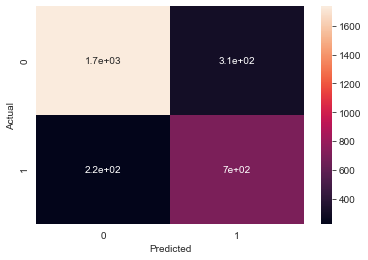

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=200))])

pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [42]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipe = Pipeline([('scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])

pipe.fit(X_train, y_train)

print(pipe.named_steps['rf'].feature_importances_)

preds = pipe.predict(X_test)

print(classification_report(y_test, preds))

[0.00651707 0.0527771  0.08258839 0.10661278 0.00818763 0.00798356
 0.00441515 0.00155354 0.00288288 0.00935936 0.00905491 0.01564404
 0.00491618 0.00075383 0.01360191 0.01210609 0.00444636 0.0166711
 0.0085522  0.02388474 0.00036512 0.00214537 0.00442307 0.02717232
 0.02707981 0.00286616 0.03143778 0.0679041  0.01055577 0.00077996
 0.03111483 0.01742052 0.00378835 0.00087494 0.0826948  0.06684678
 0.12657015 0.10345135]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2042
           1       0.76      0.66      0.70       923

    accuracy                           0.83      2965
   macro avg       0.81      0.78      0.79      2965
weighted avg       0.82      0.83      0.82      2965



## Random forest prediction for churn customers

Text(0.5, 0, 'Relative Importance')

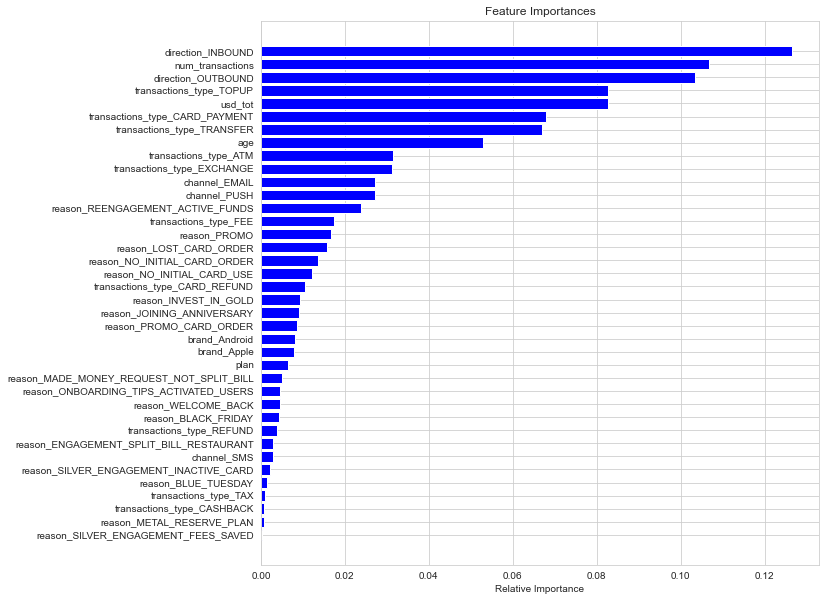

In [43]:
features = X.columns
importances = pipe.named_steps['rf'].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Graphs

In [44]:
users2_df

,user_id,plan,days_idle,churn,age,usd_tot,num_transactions,brand_Android,brand_Apple,reason_BLACK_FRIDAY,...,transactions_type_CASHBACK,transactions_type_EXCHANGE,transactions_type_FEE,transactions_type_REFUND,transactions_type_TAX,transactions_type_TOPUP,transactions_type_TRANSFER,direction_INBOUND,direction_OUTBOUND,country
0,user_9036,STANDARD,0.000000,0,22,20872.23,703,0,1,1.0,...,0.0,85.0,0.0,0.0,2.0,116.0,227.0,144.0,559.0,IE
1,user_13362,STANDARD,0.864910,0,35,1721.19,51,1,0,0.0,...,0.0,8.0,0.0,0.0,0.0,11.0,2.0,13.0,38.0,PL
2,user_8012,STANDARD,1.058248,0,23,403.69,36,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,4.0,5.0,31.0,GR
3,user_9386,STANDARD,1.434246,0,28,6731.53,243,0,1,0.0,...,0.0,74.0,1.0,0.0,2.0,23.0,45.0,26.0,217.0,IE
4,user_1314,STANDARD,1.519454,0,34,3497.09,161,0,1,0.0,...,0.0,0.0,1.0,0.0,0.0,21.0,3.0,23.0,138.0,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14816,user_14928,STANDARD,493.504149,1,33,991.90,5,1,0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,GB
14817,user_12483,STANDARD,493.920720,1,25,511.59,4,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,GB
14818,user_14621,STANDARD,494.543969,1,29,49.55,5,1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,GB
14819,user_8301,STANDARD,494.564041,1,33,1476.60,7,1,0,0.0,...,0.0,2.0,0.0,0.0,0.0,3.0,2.0,3.0,4.0,GB


In [45]:
users2_df.columns

Index(['user_id', 'plan', 'days_idle', 'churn', 'age', 'usd_tot',
       'num_transactions', 'brand_Android', 'brand_Apple',
       'reason_BLACK_FRIDAY', 'reason_BLUE_TUESDAY',
       'reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'reason_INVEST_IN_GOLD',
       'reason_JOINING_ANNIVERSARY', 'reason_LOST_CARD_ORDER',
       'reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'reason_METAL_RESERVE_PLAN',
       'reason_NO_INITIAL_CARD_ORDER', 'reason_NO_INITIAL_CARD_USE',
       'reason_ONBOARDING_TIPS_ACTIVATED_USERS', 'reason_PROMO',
       'reason_PROMO_CARD_ORDER', 'reason_REENGAGEMENT_ACTIVE_FUNDS',
       'reason_SILVER_ENGAGEMENT_FEES_SAVED',
       'reason_SILVER_ENGAGEMENT_INACTIVE_CARD', 'reason_WELCOME_BACK',
       'channel_EMAIL', 'channel_PUSH', 'channel_SMS', 'transactions_type_ATM',
       'transactions_type_CARD_PAYMENT', 'transactions_type_CARD_REFUND',
       'transactions_type_CASHBACK', 'transactions_type_EXCHANGE',
       'transactions_type_FEE', 'transactions_type_REFUND',
 

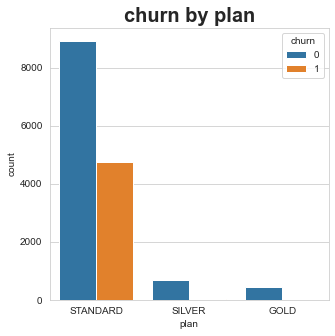

In [110]:
plt.figure(figsize=(5, 5))
plt.title('churn by plan',fontweight="bold",fontsize = 20)
sns.countplot(x='plan',hue='churn', data=users2_df,)

(-1.0, 17.0)

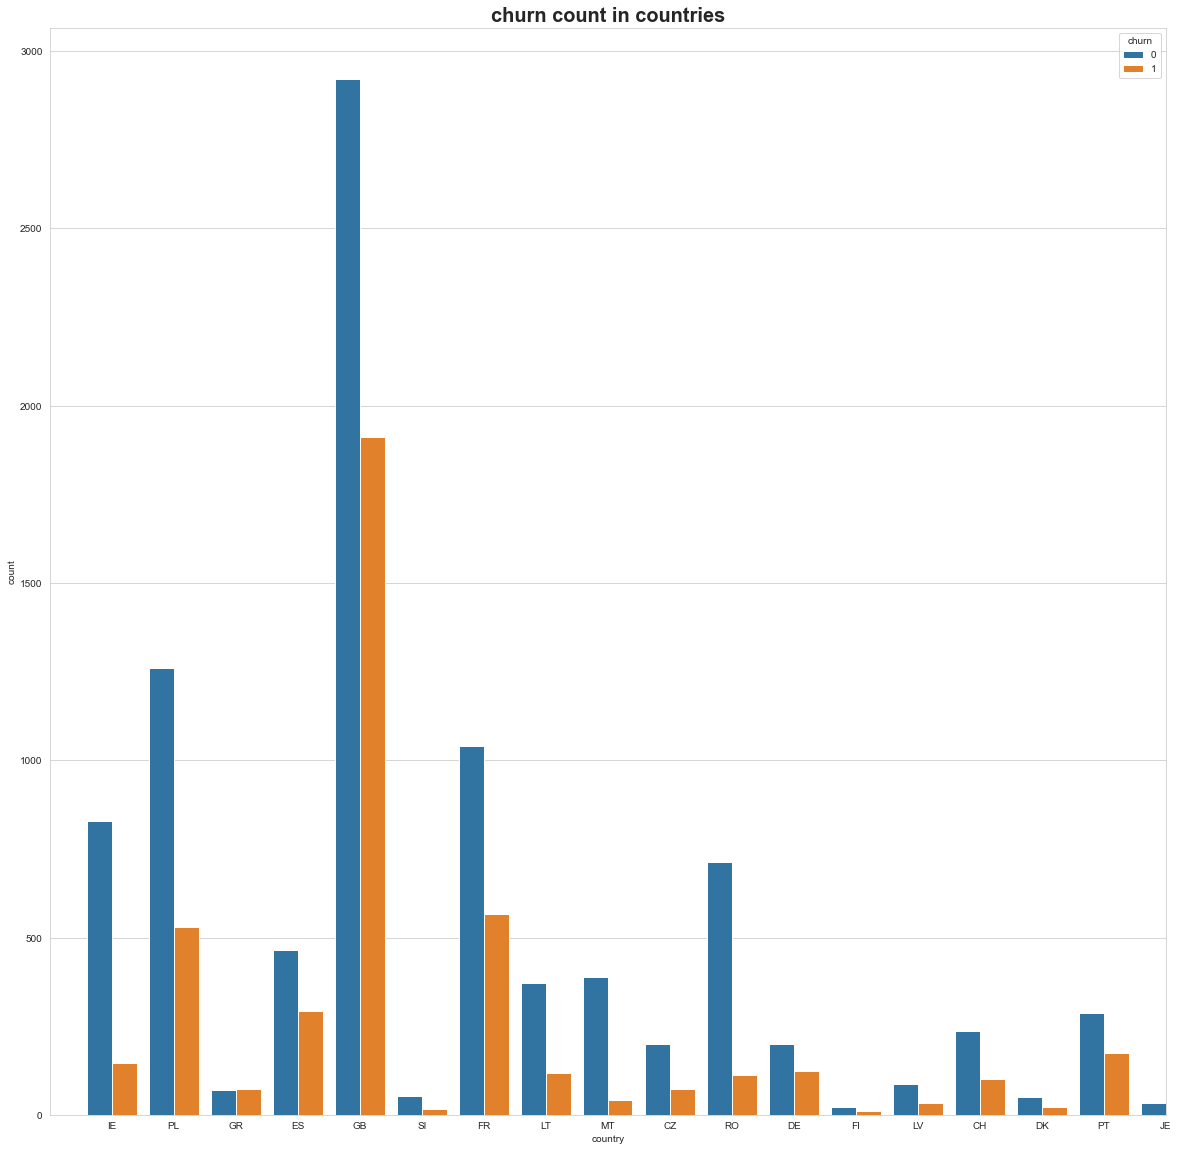

In [111]:
plt.figure(figsize=(20, 20))
plt.title('churn count in countries',fontweight="bold",fontsize = 20)
sns.countplot(x='country',hue='churn', data=users2_df)
plt.xlim(-1,17)

(18.0, 90.0)

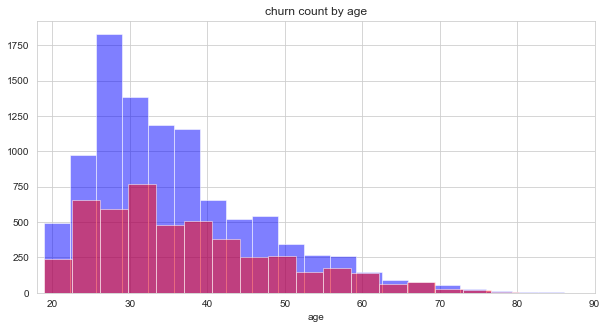

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.title('churn count by age',fontweight="bold",fontsize = 20)
plt.xlabel('age')
users2_df[users2_df.churn == 0]['age'].hist(bins=20,color='blue',alpha=0.5, ax=ax)
users2_df[users2_df.churn == 1]['age'].hist(bins=20,color='red',alpha=0.5, ax=ax)
plt.xlim(18,90)

(0.0, 500.0)

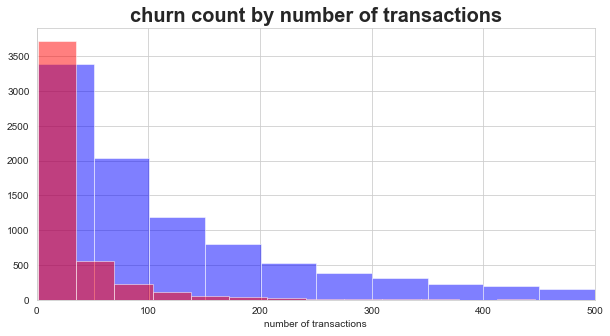

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.title('churn count by number of transactions',fontweight="bold",fontsize = 20)
plt.xlabel('number of transactions')
users2_df[users2_df.churn == 0]['num_transactions'].hist(bins=60,color='blue',alpha=0.5, ax=ax)
users2_df[users2_df.churn == 1]['num_transactions'].hist(bins=20,color='red',alpha=0.5, ax=ax)
plt.xlim(0,500)

In [145]:
churn_by_country = users2_df[users2_df['churn']!=0][['country']]
churn_by_country = pd.DataFrame(churn_by_country['country'].value_counts())

In [154]:
top5=pd.DataFrame(churn_by_country['country'].nlargest(5))

In [155]:
top5

,country
GB,1911
FR,565
PL,531
ES,293
PT,173


In [187]:
import numpy as np

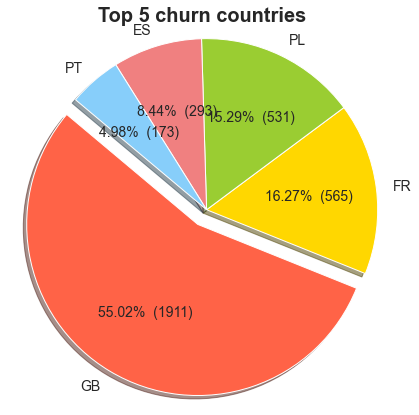

In [204]:
labels = list(top5.index) 
values = top5['country']
colors = ['tomato','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0) 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(7, 7))
plt.title('Top 5 churn countries',fontweight="bold",fontsize = 20)

plt.pie(values, explode=explode, labels=labels, colors=colors,
autopct= make_autopct(values),textprops={'fontsize': 14}, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Metrics

In [ ]:
#churn rate..